In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
yt_data = pd.read_csv("../data/USvideos_cc50.csv")
yt_data[:3]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922)
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Nevada,39.876019,-117.224121,POINT (-117.224121 39.876019)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Delaware,39.000000,-75.500000,POINT (-75.5 39)


In [71]:
#Cantidad de filas en yt_data
print(len(yt_data))

40949


In [72]:
#Dataset sin data duplicada
yt_data_u = yt_data.drop_duplicates()
print(len(yt_data_u))

40948


In [73]:
#Ambos codigos nos muestran que no hay ningun valor NULL o ""
yt_data_u[yt_data_u == "NULL"].sum(skipna=True)
yt_data_u[yt_data_u == ""].sum(skipna=True)

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id               0.0
publish_time                0
tags                        0
views                     0.0
likes                     0.0
dislikes                  0.0
comment_count             0.0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description                 0
state                       0
lat                       0.0
lon                       0.0
geometry                    0
dtype: object

In [74]:
#Eliminar entradas donde "video_id" es faltante
yt_data_u = yt_data_u[yt_data["video_id"].notna()]
print(len(yt_data_u))
#No hay ninguna fila que no tenga un id correcto

40948


C:\Users\frows\AppData\Local\Temp\ipykernel_3248\1294224563.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yt_data_u = yt_data_u[yt_data["video_id"].notna()]


In [75]:
#Verificar que todos los id sean de 11 caracteres
for i in yt_data_u["video_id"]:
    if(len(i)!=11):
        print("Error")
#No hay ningun error en video_id

In [76]:
#Buscamos los datos que sean NaN
yt_data_u.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
state                       0
lat                         0
lon                         0
geometry                    0
dtype: int64

In [77]:
#Encontramos que la descripcion presenta 570 entradas faltantes
#Al ser texto y no presentar informacion relevante para la investigacion,
#decidimos eliminarla
yt_data_u.drop(columns=["description"], inplace=True, axis = 1)

In [78]:
#Trabajar con las variables trending_date y publish_time como fechas y no como tipo objeto
yt_data_u["trending_date"] = pd.to_datetime(yt_data_u["trending_date"], format="%y.%d.%m")
yt_data_u["publish_time"] = pd.to_datetime(yt_data_u["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ")


In [79]:
#Creating a dataset to read the category types
categories = pd.read_json("../data/US_category_id.json")
categories["items"].to_json("../data/categories.json")
items = pd.read_json("../data/categories.json",orient="index")
items.head()
items["snippet"].to_json("../data/items.json")
snippet = pd.read_json("../data/items.json",orient='index')
snippet.head()
df2 = pd.DataFrame()
df2["id"] = items["id"]
df2["title"] = snippet["title"]
df2

,id,title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [80]:
#Creando una columna para el nombre de la categoría
yt_data_u["category_name"] = yt_data_u["category_id"].map(df2.set_index("id")["title"])
yt_data_u["category_name"]


0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
40944      Pets & Animals
40945      People & Blogs
40946       Entertainment
40947    Film & Animation
40948              Gaming
Name: category_name, Length: 40948, dtype: object

c:\Users\frows\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


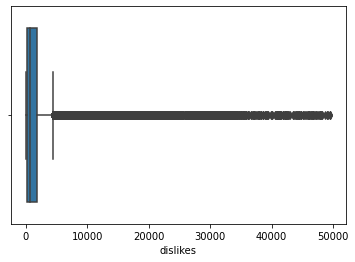

c:\Users\frows\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='comment_count'>

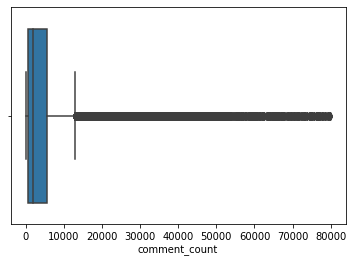

In [81]:
#Tanto en las columnas de "dislikes" y "comment_count" se han eliminado los outliers. Esto debido a que son objeto de estudio.
yt_data_u = yt_data_u[yt_data_u["dislikes"] <= 50000]
sns.boxplot(yt_data_u["dislikes"])
plt.show()
yt_data_u = yt_data_u[yt_data_u["comment_count"] <= 80000]
sns.boxplot(yt_data_u["comment_count"])


In [86]:
#Guardar el dataset
yt_data_u.head(5)
yt_data_u.to_csv("../data/yt_data.csv", index=False)